In [1]:
from pycaret.classification import compare_models, models, create_model, tune_model, predict_model, setup, compare_models, evaluate_model

In [2]:
from script.configurationInitializer import init_random_seed
random_state = 256
init_random_seed(random_state, using_torch=False)

from script.loadData import load_wx

In [3]:
df, category_code = load_wx(path='dataset/SouthSea/WX4-2-1(2).xlsx', value_range_correction=False)
df, category_code

col_names ['深度', 'RHOB', 'GR', 'SP', 'CN', 'RT', '_岩性_主名']
Counter before dealing:  Counter({'泥岩': 8893, '粉砂岩': 970, '细砂岩': 512, '泥灰岩': 104, '中砂岩': 96, '粗砂岩': 50, '细砾岩': 48, '煤层': 28, '煤': 8})
Counter after dealing Counter({1: 8893, 0: 970, 2: 512, 6: 104, 3: 96, 4: 50, 5: 48, 7: 36})


(             深度   RHOB       GR      SP      CN      RT  _岩性_主名
 0      1366.000  2.243   70.888  53.585  27.744   7.758       1
 1      1366.125  2.250   71.755  51.123  27.922   7.402       1
 2      1366.250  2.242   71.747  48.873  28.344   6.780       1
 3      1366.375  2.225   70.748  47.021  29.469   5.914       1
 4      1366.500  2.209   69.289  45.486  31.316   4.938       1
 ...         ...    ...      ...     ...     ...     ...     ...
 10704  2704.000  2.666  109.744  11.529  16.897  23.318       1
 10705  2704.125  2.666  105.617  11.964  16.954  24.824       1
 10706  2704.250  2.665  102.261  12.379  17.487  27.139       1
 10707  2704.375  2.667   99.310  12.507  18.418  29.214       1
 10708  2704.500  2.672   97.394  12.286  19.449  29.855       1
 
 [10709 rows x 7 columns],
 {'粉砂岩': 0,
  '泥岩': 1,
  '细砂岩': 2,
  '中砂岩': 3,
  '粗砂岩': 4,
  '细砾岩': 5,
  '泥灰岩': 6,
  '煤层': 7})

In [4]:
df.pop('深度')

0        1366.000
1        1366.125
2        1366.250
3        1366.375
4        1366.500
           ...   
10704    2704.000
10705    2704.125
10706    2704.250
10707    2704.375
10708    2704.500
Name: 深度, Length: 10709, dtype: float64

In [5]:
df

,RHOB,GR,SP,CN,RT,_岩性_主名
0,2.243,70.888,53.585,27.744,7.758,1
1,2.250,71.755,51.123,27.922,7.402,1
2,2.242,71.747,48.873,28.344,6.780,1
3,2.225,70.748,47.021,29.469,5.914,1
4,2.209,69.289,45.486,31.316,4.938,1
...,...,...,...,...,...,...
10704,2.666,109.744,11.529,16.897,23.318,1
10705,2.666,105.617,11.964,16.954,24.824,1
10706,2.665,102.261,12.379,17.487,27.139,1
10707,2.667,99.310,12.507,18.418,29.214,1


In [6]:
from sklearn.model_selection import train_test_split
label = df.pop('_岩性_主名')
label

0        1
1        1
2        1
3        1
4        1
        ..
10704    1
10705    1
10706    1
10707    1
10708    1
Name: _岩性_主名, Length: 10709, dtype: int64

In [7]:
x1, x2, y1, y2 = train_test_split(df, label, test_size=0.3, stratify=label)
import pandas as pd
train_data = pd.concat([x1, y1], axis=1)
test_data = pd.concat([x2, y2], axis=1)
test_data

,RHOB,GR,SP,CN,RT,_岩性_主名
552,2.152,62.873,58.324,37.791,2.400,1
4134,2.335,70.866,76.366,28.792,4.169,2
4638,2.408,75.233,77.900,33.459,2.219,1
6721,2.601,68.110,5.819,16.679,6.309,1
9428,2.330,113.039,19.928,30.553,5.523,1
...,...,...,...,...,...,...
3141,2.094,60.970,69.883,38.187,2.217,1
5649,2.303,65.499,14.655,26.105,5.650,1
10451,2.685,83.200,13.480,15.976,37.896,1
4903,2.203,42.470,-999.000,38.200,0.914,1


In [8]:
setup(data=train_data, test_data=test_data, target='_岩性_主名', fold=5)

,Description,Value
0,session_id,8159
1,Target,_岩性_主名
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(7496, 6)"
5,Missing Values,0
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


(False,
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='_岩性_主名',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='_岩性_主名')),
           

In [9]:
compare_models(include=['knn', 'nb', 'dt', 'rbfsvm', 'svm', 'gbc', 'lightgbm', 'xgboost', 'ada', 'lr', 'rf'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9266,0.9620,0.7350,0.9224,0.9215,0.7293,0.7367,0.1440
xgboost,Extreme Gradient Boosting,0.9232,0.9566,0.7360,0.9188,0.9182,0.7174,0.7242,0.6160
lightgbm,Light Gradient Boosting Machine,0.9226,0.9575,0.7133,0.9186,0.9183,0.7180,0.7232,0.1920
knn,K Neighbors Classifier,0.8977,0.9217,0.6348,0.8911,0.8919,0.6293,0.6336,0.6180
gbc,Gradient Boosting Classifier,0.8938,0.9314,0.6004,0.8837,0.8836,0.5904,0.6034,1.4440
rbfsvm,SVM - Radial Kernel,0.8907,0.8962,0.5361,0.8811,0.8709,0.5308,0.5732,6.0560
dt,Decision Tree Classifier,0.8890,0.8307,0.6730,0.8914,0.8897,0.6328,0.6330,0.4420
lr,Logistic Regression,0.8355,0.8182,0.1621,0.7750,0.7792,0.1354,0.2050,0.4940
ada,Ada Boost Classifier,0.7888,0.5709,0.1873,0.7223,0.7498,0.1215,0.1280,0.0700
svm,SVM - Linear Kernel,0.7588,0.0000,0.1759,0.7826,0.7469,0.1939,0.2240,0.0220


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8159, verbose=0,
                       warm_start=False)

In [10]:
knn = create_model('knn')
print(knn)
evaluate_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9121,0.6829,0.8938,0.8945,0.6364,0.6409
1,0.9053,0.9304,0.6201,0.8962,0.8976,0.6451,0.6533
2,0.8953,0.9193,0.6202,0.8895,0.8891,0.6215,0.6250
3,0.8879,0.9169,0.5952,0.8811,0.8815,0.5932,0.5969
4,0.8999,0.9299,0.6558,0.8948,0.8967,0.6506,0.6519
Mean,0.8977,0.9217,0.6348,0.8911,0.8919,0.6293,0.6336
SD,0.0058,0.0073,0.0308,0.0054,0.0060,0.0206,0.0210


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [11]:
nb = create_model('nb')
print(nb)
evaluate_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6173,0.7389,0.5776,0.7868,0.6803,0.1684,0.1905
1,0.6231,0.7440,0.5665,0.7755,0.6818,0.1576,0.1766
2,0.6237,0.7538,0.5960,0.7831,0.6847,0.1708,0.1922
3,0.6191,0.7497,0.5510,0.7844,0.6818,0.1661,0.1870
4,0.6037,0.7310,0.6687,0.7685,0.6635,0.1450,0.1650
Mean,0.6174,0.7435,0.5920,0.7797,0.6784,0.1616,0.1823
SD,0.0072,0.0080,0.0411,0.0068,0.0076,0.0094,0.0102


GaussianNB(priors=None, var_smoothing=1e-09)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
dt = create_model('dt')
print(dt)
evaluate_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8913,0.8324,0.7315,0.8944,0.8924,0.6430,0.6433
1,0.8853,0.8210,0.6697,0.8871,0.8858,0.6212,0.6213
2,0.8873,0.8203,0.6644,0.8869,0.8869,0.6219,0.6220
3,0.8906,0.8493,0.6712,0.8957,0.8925,0.6450,0.6456
4,0.8906,0.8302,0.6280,0.8928,0.8910,0.6327,0.6328
Mean,0.8890,0.8307,0.6730,0.8914,0.8897,0.6328,0.6330
SD,0.0023,0.0105,0.0333,0.0037,0.0028,0.0101,0.0102


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8159, splitter='best')


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [13]:
svm = create_model('rbfsvm')
print(svm)
evaluate_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8907,0.8793,0.5383,0.8826,0.8689,0.5243,0.5740
1,0.8939,0.8957,0.5527,0.8847,0.8748,0.5452,0.5878
2,0.8893,0.8987,0.5025,0.8826,0.8676,0.5147,0.5649
3,0.8793,0.9018,0.5114,0.8612,0.8568,0.4787,0.5185
4,0.9006,0.9056,0.5756,0.8945,0.8866,0.5909,0.6208
Mean,0.8907,0.8962,0.5361,0.8811,0.8709,0.5308,0.5732
SD,0.0070,0.0091,0.0268,0.0109,0.0097,0.0370,0.0333


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=8159, shrinking=True, tol=0.001,
    verbose=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
gbm = create_model('gbc')
print(gbm)
evaluate_model(gbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9292,0.6285,0.8952,0.8918,0.6153,0.6291
1,0.8966,0.9228,0.6289,0.8858,0.8867,0.6028,0.6151
2,0.8959,0.9310,0.6086,0.8877,0.8858,0.6031,0.6147
3,0.8859,0.9435,0.6004,0.8717,0.8739,0.5553,0.5691
4,0.8906,0.9303,0.5358,0.8782,0.8797,0.5756,0.5892
Mean,0.8938,0.9314,0.6004,0.8837,0.8836,0.5904,0.6034
SD,0.0050,0.0067,0.0342,0.0081,0.0062,0.0218,0.0214


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8159, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

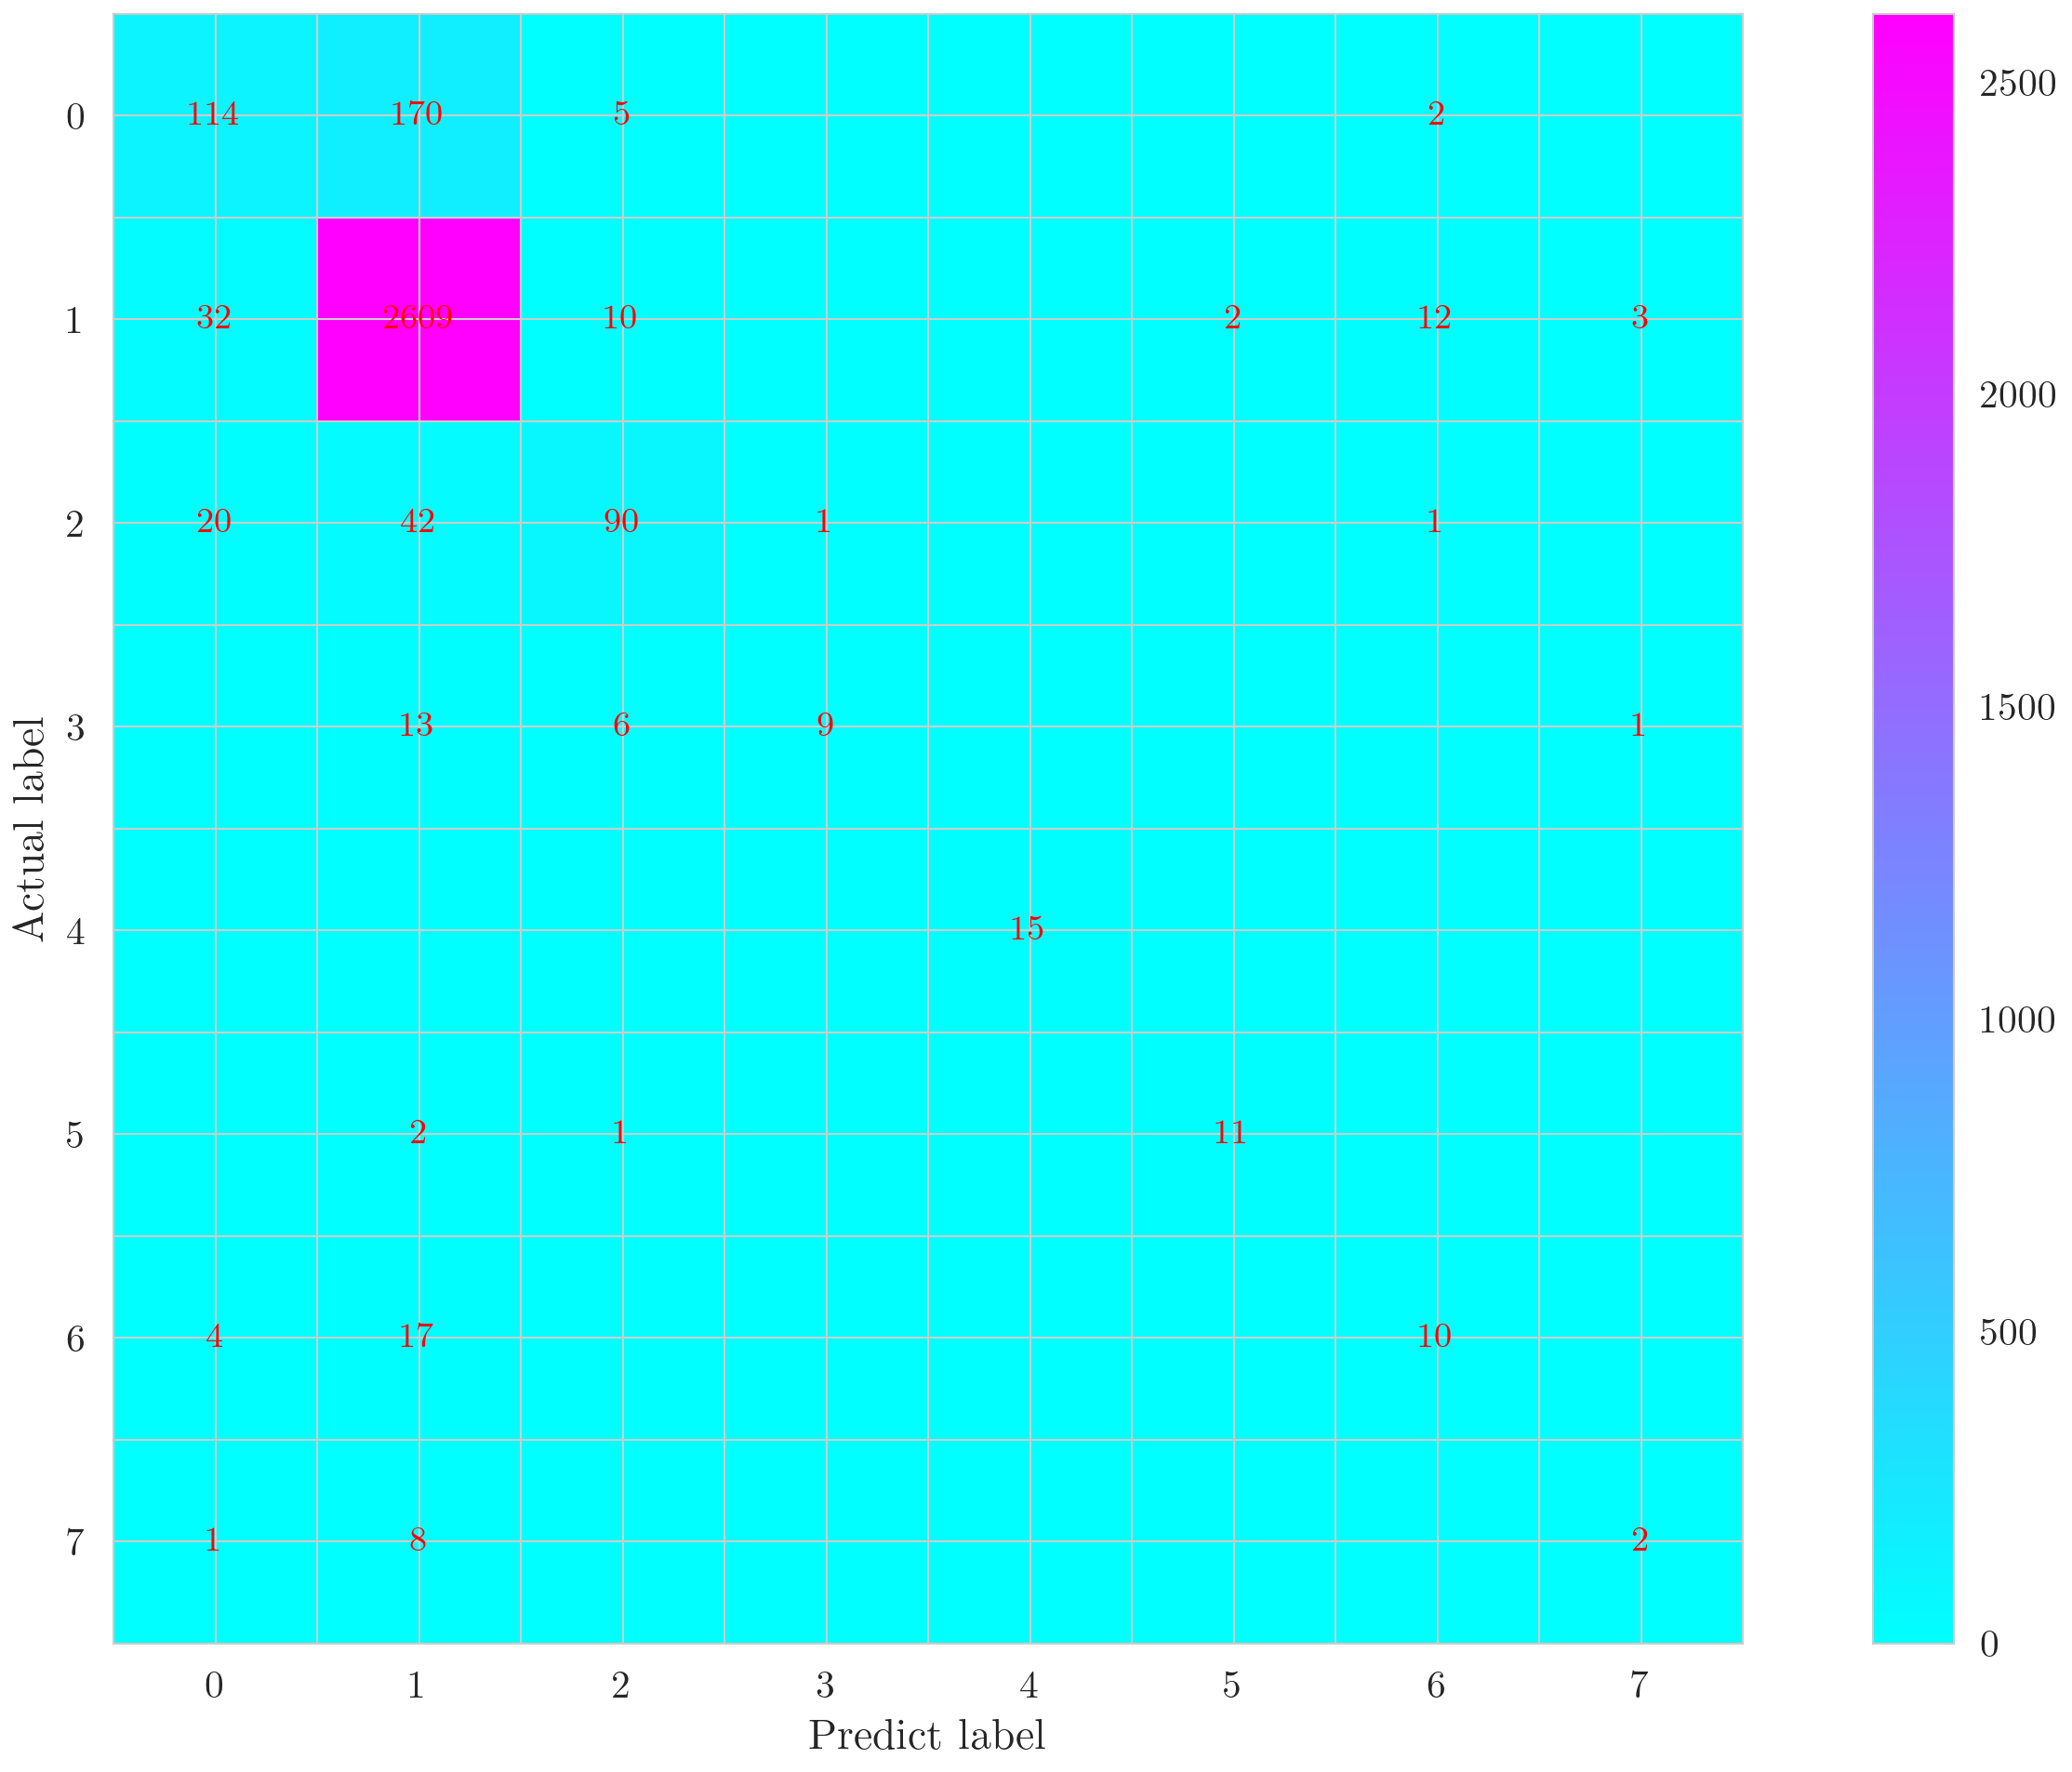

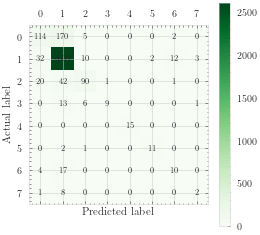

[[ 114  170    5    0    0    0    2    0]
 [  32 2609   10    0    0    2   12    3]
 [  20   42   90    1    0    0    1    0]
 [   0   13    6    9    0    0    0    1]
 [   0    0    0    0   15    0    0    0]
 [   0    2    1    0    0   11    0    0]
 [   4   17    0    0    0    0   10    0]
 [   1    8    0    0    0    0    0    2]]


In [20]:
%matplotlib inline
from script.confusionMatrixView import plot_confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
from script.configurationInitializer import init_matplotlib_style
import numpy as np

cm_gbm = np.array([
    [114, 170, 5, 0, 0, 0, 2, 0], [32, 2609, 10, 0, 0, 2, 12, 3], [20, 42, 90, 1, 0, 0, 1, 0], [0, 13, 6, 9, 0, 0, 0, 1],
    [0, 0, 0, 0, 15, 0, 0, 0], [0, 2, 1, 0, 0, 11, 0, 0], [4, 17, 0, 0, 0, 0, 10, 0], [1, 8, 0, 0, 0, 0, 0, 2]
])

init_matplotlib_style(style='science')
matplotlib.rcParams['text.usetex'] = True  # LaTex style
matplotlib.rcParams['savefig.dpi'] = 600

axes_ticks = [key for key in range(len(cm_gbm))]
plot_confusion_matrix(cm_gbm, save_name=f'procedure/GBM confusion matrix-self.tif', n_classes=8, axes_ticks=None, title=None, text_fontsize=9,
                         x_rotation=0)
    
plt.matshow(cm_gbm, cmap=plt.cm.Greens) 
plt.colorbar()
for i in range(len(cm_gbm)): 
    for j in range(len(cm_gbm)):
        plt.annotate(cm_gbm[i, j], xy=(j, i), horizontalalignment='center', verticalalignment='center', fontsize=8)
x_locations =np.array(range(len(cm_gbm)))
plt.xticks(x_locations, axes_ticks, rotation=0)
plt.yticks(x_locations, axes_ticks)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig(f'procedure/GBM confusion matrix.tif', bbox_inches='tight')
plt.show()
print(cm_gbm)


In [16]:
lightgbm = create_model('lightgbm')
print(lightgbm)
evaluate_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9247,0.9497,0.7663,0.9213,0.9212,0.7283,0.7326
1,0.9246,0.9551,0.7166,0.9210,0.9202,0.7232,0.7294
2,0.9139,0.9593,0.6802,0.9085,0.9082,0.6841,0.6901
3,0.9173,0.9647,0.6627,0.9120,0.9127,0.6987,0.7035
4,0.9326,0.9585,0.7405,0.9300,0.9293,0.7557,0.7604
Mean,0.9226,0.9575,0.7133,0.9186,0.9183,0.7180,0.7232
SD,0.0065,0.0050,0.0380,0.0076,0.0073,0.0248,0.0245


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8159, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…